In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('file:///home/prince_singh/Music/tensorflow/handson-ml2/datasets/housing/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.shape

(20640, 10)

In [6]:
import seaborn as sns

<AxesSubplot:>

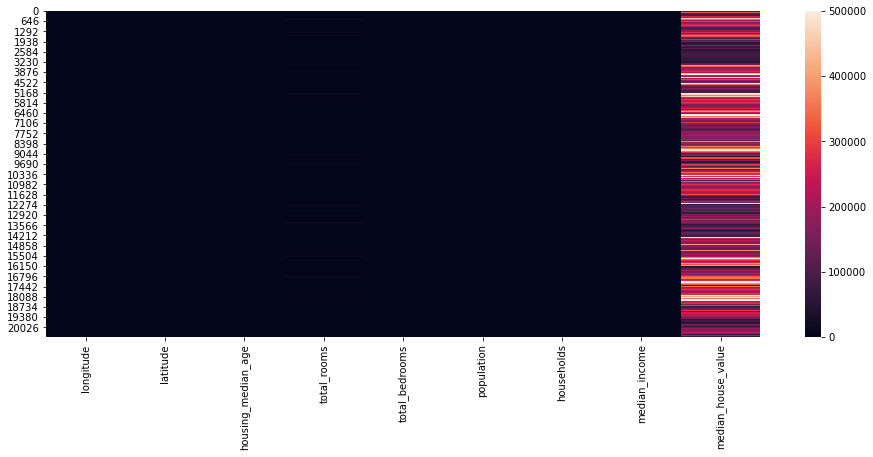

In [7]:
plt.figure(figsize=(16,6))
sns.heatmap(housing.drop('ocean_proximity', axis = 1))

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.total_bedrooms.count()

20433

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

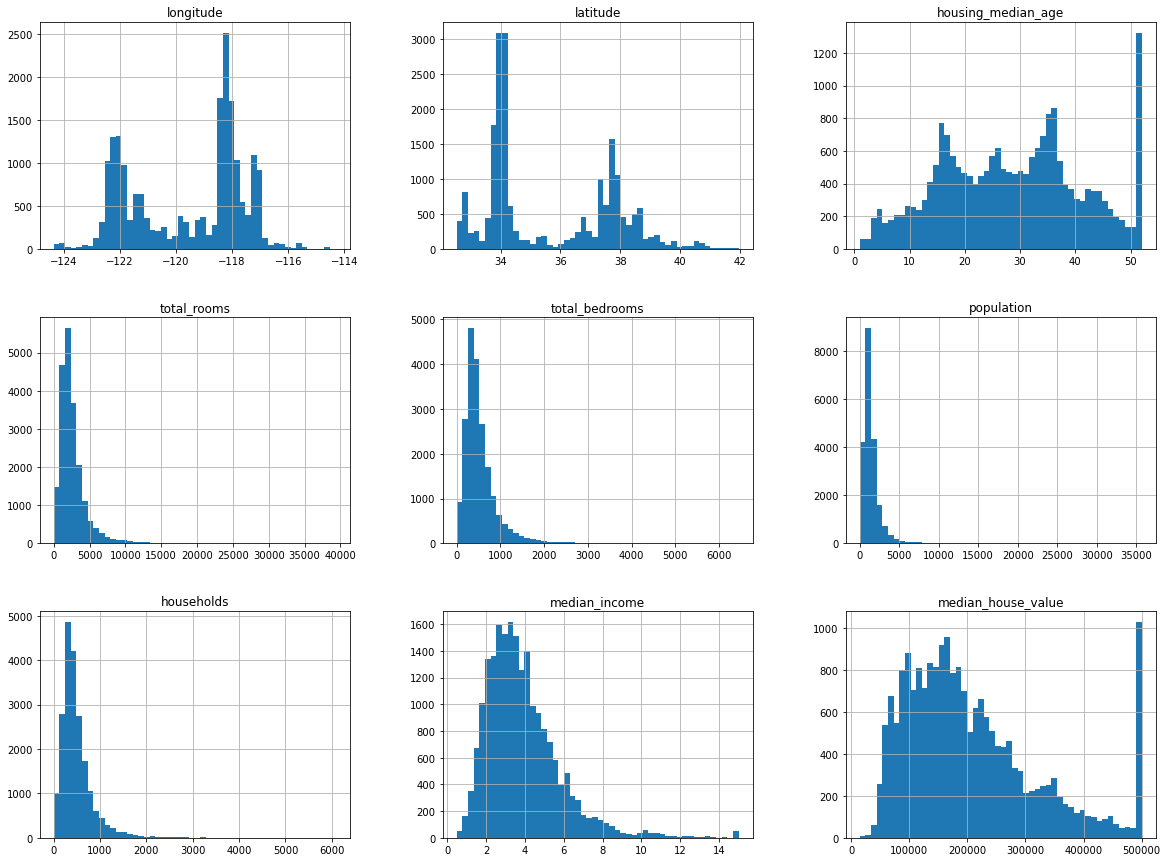

In [11]:
housing.hist(bins =50, figsize=(20,15))

In [12]:
#sns.pairplot(housing, hue = 'ocean_proximity')

## spliting the data

In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [14]:
train_set, test_set = split_train_test(housing,0.2)

In [15]:
len(train_set)

16512

In [16]:
len(test_set)

4128

In [17]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*2**32

def split_train_test_by_id(data,test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [18]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing_with_id['id']= housing['longitude']*1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id,0.2, 'id')

## Stratified Sampling

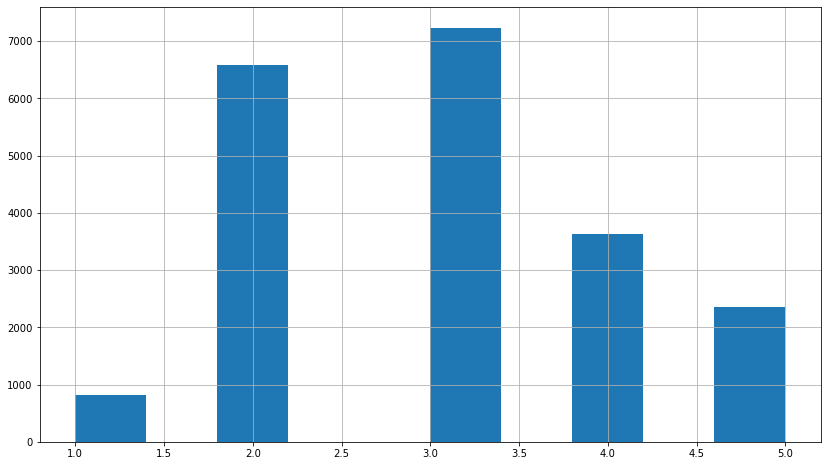

In [20]:
housing['income_cat']= pd.cut(housing['median_income'], bins = [0.0,1.5,3.0,4.5,6.0, np.inf], labels = [1,2,3,4,5])
plt.figure(figsize=(14,8))
housing['income_cat'].hist();

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size =0.2, random_state =42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

* Now, removing 'income_cat' from both training and testing data

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis =1, inplace= True)

# Data Exploration

In [24]:
housing =strat_train_set.copy()

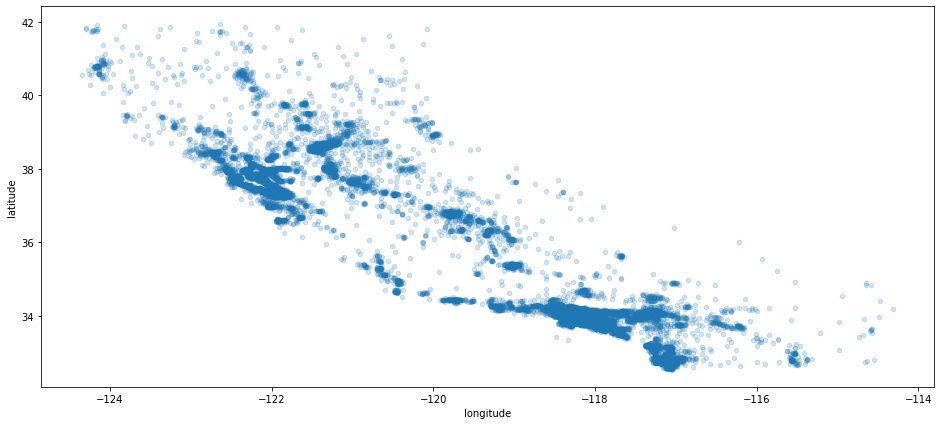

In [25]:

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.2,figsize=(16,7));

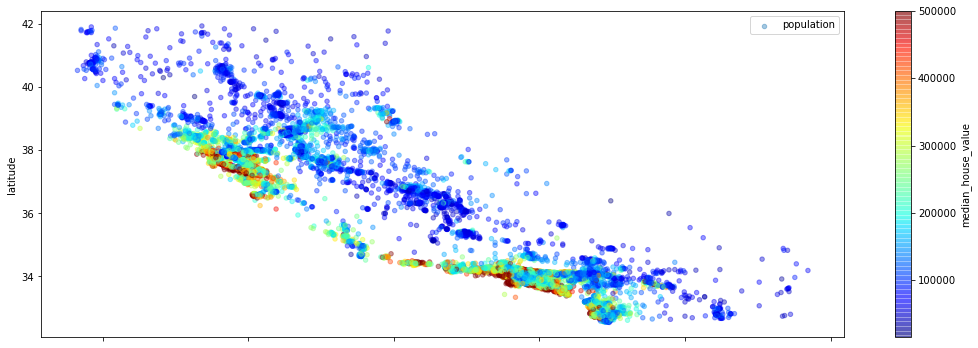

In [26]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, figsize = (18,6),
            style = housing['population']/100,label='population',colorbar =True, c = 'median_house_value',
             cmap = plt.get_cmap('jet'));

## Looking For Correlations

This method is only for less data 

In [27]:
corr_matrix = housing.corr()

In [28]:
corr_matrix['median_house_value']

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [29]:
from pandas.plotting import scatter_matrix

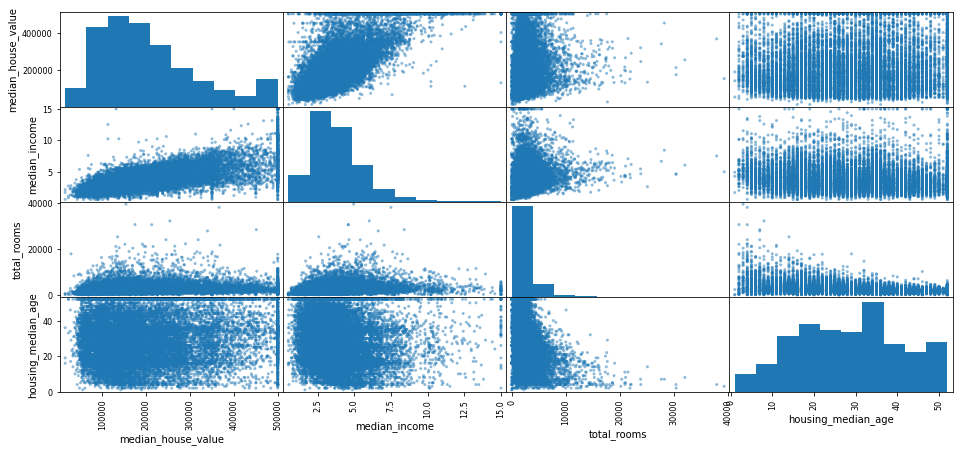

In [30]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(16,7));

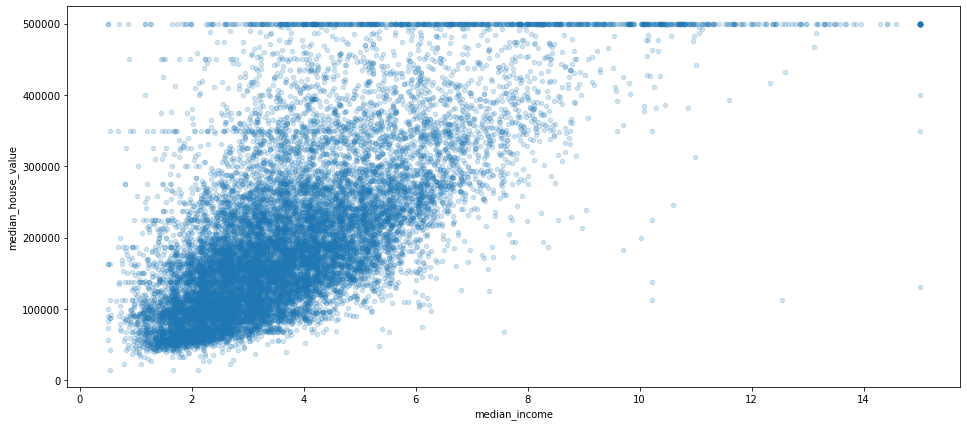

In [31]:
housing.plot(kind = 'scatter', x = 'median_income',y = 'median_house_value', alpha = 0.2,figsize = (16,7));

## Eperiments with attributes (new atrributes for improved correlation)

In [32]:
housing['rooms_per_household'] = housing['total_rooms']/ housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']= housing['population']/housing['households']

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix['median_house_value']

longitude                  -0.047432
latitude                   -0.142724
housing_median_age          0.114110
total_rooms                 0.135097
total_bedrooms              0.047689
population                 -0.026920
households                  0.064506
median_income               0.687160
median_house_value          1.000000
rooms_per_household         0.146285
bedrooms_per_room          -0.259984
population_per_household   -0.021985
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning

In [35]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

CLEANING
* REMEMBER : 'total_bedrooms' attribute has some missing values.
 Possible solutions are follows :
1. housing.dropna(subset=['total_bedrooms'])
2. housing.drop('total_bedrooms', axis =1)
3. We are using below.

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

  4. Using sklearn.impute.SimpleImputer

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [37]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [38]:
X = imputer.fit_transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

## Handling Text and Catagorical Attributes

In [40]:
housing_cat = housing[['ocean_proximity']]
type(housing_cat)

pandas.core.frame.DataFrame

In [41]:
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


* Converting these categories into NUMBERS

In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoding = ordinal_encoder.fit_transform(housing_cat)

In [43]:
housing_cat_encoding[:5]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.]])

In [44]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## One Hot Coding

In [45]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
type(housing_cat_1hot)

scipy.sparse.csr.csr_matrix

In [46]:
# To convert it to  a NumpPy array, call toarray()
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [47]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

# Custom Transformers

In [48]:
from sklearn.base import BaseEstimator,TransformerMixin

In [49]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X,y=None):
        return self        # Nothing else to do
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    

In [50]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_atttribs = attr_adder.transform(housing.values)

# Feature Scaling
* MinMaxScaler
* StandardScaler

## Transformation pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')),
                          ('attribs_adder', CombinedAttributesAdder()),
                          ('std_scaler', StandardScaler())
                        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [52]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', OneHotEncoder(), cat_attribs)
    ])

In [53]:
housing_prepared = full_pipeline.fit_transform(housing)

# Training and Evaluating on Training Set

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

* Taking Few Instance from Training Set

In [55]:
some_data = housing.iloc[:5]

In [56]:
some_labels = housing_labels.iloc[:5]

In [57]:
some_data_prepared = full_pipeline.transform(some_data)

In [58]:
print('Predictions', lin_reg.predict(some_data_prepared))
print('Corresponding labels:' , list(some_labels))

Predictions [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Corresponding labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848922

## Under Fitting

Very Large error

Try With DecisionTreeRegressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [61]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

## This is OverFitting

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_score = np.sqrt(-scores)

In [63]:
def display_scores(scores):
    print('Scores : ' , scores)
    print('Mean : ', scores.mean())
    print('Standard Deviation : ', scores.std())

In [64]:
display_scores(tree_rmse_score)

Scores :  [69330.62106303 67257.87011689 70467.07649889 68992.80498596
 70735.85096106 74757.87124406 72770.68831898 70812.49912967
 76732.37130587 69564.44829909]
Mean :  71142.21019234994
Standard Deviation :  2705.2489380263896


The decision Tree has a score of approximately 70,858  generally + - 2498

In [65]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
lin_rmse_score = np.sqrt(-scores)

In [66]:
display_scores(lin_rmse_score)

Scores :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean :  69052.46136345083
Standard Deviation :  2731.674001798347


The Decision Tree Model is over fitting so badly that it performs worse that the Linear Regression Model.

## RandomForestRegressor Model

In [67]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [68]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_score = np.sqrt(-scores)

In [70]:
display_scores(forest_rmse_score)

Scores :  [49596.02010929 47610.21142036 49919.73387414 52133.21777141
 49657.49221626 53334.67693416 48920.67270026 47879.99133466
 53264.51313283 49620.30499809]
Mean :  50193.683449144664
Standard Deviation :  1943.0439372557978


# Fine Tuning The Model

## Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [
            { 'n_estimators': [ 10, 30, 90],'max_features': [ 4, 6, 8, 10]},
            { 'bootstrap': [False], 'n_estimators': [ 10, 50], 'max_features': [ 3, 4,5]}
     ]
forest_reg1 = RandomForestRegressor()

grid_search = GridSearchCV( forest_reg1, param_grid, cv =5,
                            scoring = 'neg_mean_squared_error',
                            return_train_score = True,
                             verbose=2,
                            )

In [80]:
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ....................max_features=4, n_estimators=10; total time=   0.5s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.5s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.5s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.5s
[CV] END ....................max_features=4, n_estimators=10; total time=   0.5s
[CV] END ....................max_features=4, n_estimators=30; total time=   1.5s
[CV] END ....................max_features=4, n_estimators=30; total time=   1.5s
[CV] END ....................max_features=4, n_estimators=30; total time=   1.4s
[CV] END ....................max_features=4, n_estimators=30; total time=   1.4s
[CV] END ....................max_features=4, n_estimators=30; total time=   1.5s
[CV] END ....................max_features=4, n_estimators=90; total time=   4.5s
[CV] END ....................max_features=4, n_e

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [10, 30, 90]},
                         {'bootstrap': [False], 'max_features': [3, 4, 5],
                          'n_estimators': [10, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [81]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

52664.99660566543 {'max_features': 4, 'n_estimators': 10}
50599.48328025783 {'max_features': 4, 'n_estimators': 30}
49974.3099044307 {'max_features': 4, 'n_estimators': 90}
52210.34485992428 {'max_features': 6, 'n_estimators': 10}
49880.56091631533 {'max_features': 6, 'n_estimators': 30}
49386.75255433896 {'max_features': 6, 'n_estimators': 90}
52207.301706116865 {'max_features': 8, 'n_estimators': 10}
50288.43425875555 {'max_features': 8, 'n_estimators': 30}
49429.68290651986 {'max_features': 8, 'n_estimators': 90}
52404.752943237996 {'max_features': 10, 'n_estimators': 10}
50245.828084330664 {'max_features': 10, 'n_estimators': 30}
49554.71743412587 {'max_features': 10, 'n_estimators': 90}
52454.940295988934 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
49760.91227473381 {'bootstrap': False, 'max_features': 3, 'n_estimators': 50}
51469.40329226257 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
49065.30248124837 {'bootstrap': False, 'max_features': 4, 'n_est

In [83]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=5, n_estimators=50)

In [84]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [85]:
feature_importances

array([8.00593330e-02, 7.04264701e-02, 4.27411199e-02, 1.93183184e-02,
       1.78827068e-02, 1.87138110e-02, 1.72444038e-02, 3.28085056e-01,
       6.38632628e-02, 1.04068792e-01, 7.05108167e-02, 1.47033190e-02,
       1.39937661e-01, 6.42219358e-05, 5.93638830e-03, 6.44431934e-03])

## Importance Score of each Feature

In [88]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedroom_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs +  cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse =True)

[(0.32808505587089315, 'median_income'),
 (0.13993766081409334, 'INLAND'),
 (0.10406879220883523, 'pop_per_hhold'),
 (0.0800593330385153, 'longitude'),
 (0.07051081667388717, 'bedroom_per_room'),
 (0.07042647006917005, 'latitude'),
 (0.06386326276537752, 'rooms_per_hhold'),
 (0.042741119887527594, 'housing_median_age'),
 (0.01931831842695589, 'total_rooms'),
 (0.018713811009616374, 'population'),
 (0.017882706815046362, 'total_bedrooms'),
 (0.017244403837368805, 'households'),
 (0.01470331900493212, '<1H OCEAN'),
 (0.006444319342567613, 'NEAR OCEAN'),
 (0.005936388299401079, 'NEAR BAY'),
 (6.422193581248841e-05, 'ISLAND')]

In [89]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis =1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [90]:
print('Final_MSE :', final_mse)
print('Final RMSE :', final_rmse)

Final_MSE : 2168933228.831279
Final RMSE : 46571.80723174997


# Ready for Production
 * Exporting the model to .py file

In [97]:
import joblib

joblib.dump(final_model, 'cal_housing_price_1.pkl')

['cal_housing_price_1.pkl']